In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Campaña publicitaria de refrescos
# Existen tres tipos de bebidas
# A (Coca Cola), B (Pepsi) y C (Del Valle). Se ha estudiado el comportamiento de los consumidores y
# se ha determinado la siguiente matriz de transición que representa los cambios de preferencia entre marcas.

# Matriz de transición P
matriz_transicion = np.array([[0.6, 0.3, 0.1],
                              [0.3, 0.5, 0.2],
                              [0.4, 0.3, 0.3]])

In [5]:
# A. Determinar la cantidad de población en cada estado tras una iteración
# Se inicia con 1000 consumidores distribuidos de la siguiente forma: A=200, B=300, C=500
poblacion = np.array([200, 300, 500])

# Función para calcular el siguiente estado de la población
def siguiente_estado_poblacion(pob, matriz_trans, pasos=1):
    for _ in range(pasos):
        pob = np.dot(pob, matriz_trans)
    return pob

nueva_poblacion = siguiente_estado_poblacion(poblacion, matriz_transicion)
print("Población en el siguiente estado:", nueva_poblacion)

Población en el siguiente estado: [410. 360. 230.]


In [6]:
#B. Consumo anual de refrescos en un país de 50M de habitantes con 1 litro por semana
poblacion_pais = 50_000_000
litros_por_persona_semanal = 1
semanas_por_año = 52
total_litros_anual = poblacion_pais * litros_por_persona_semanal * semanas_por_año

#Distribución del consumo por compañía
distribucion_inicial = np.array([0.2, 0.3, 0.5])  # población inicial
consumo_distribuido = siguiente_estado_poblacion(distribucion_inicial, matriz_transicion) * total_litros_anual

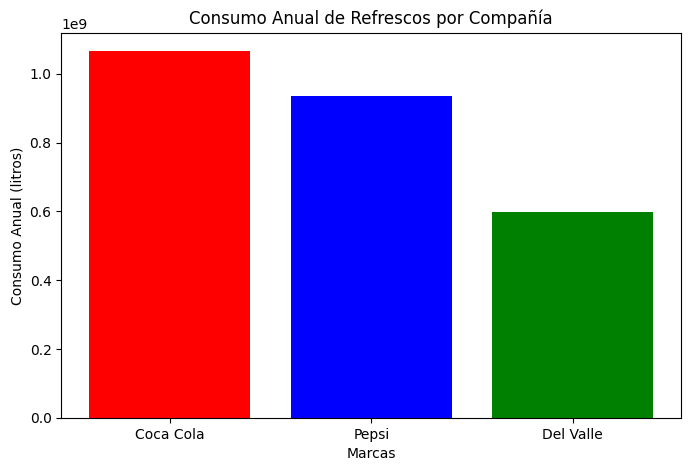

In [7]:

# Graficar consumo anual
companias = ["Coca Cola", "Pepsi", "Del Valle"]
plt.figure(figsize=(8, 5))
plt.bar(companias, consumo_distribuido, color=['red', 'blue', 'green'])
plt.xlabel("Marcas")
plt.ylabel("Consumo Anual (litros)")
plt.title("Consumo Anual de Refrescos por Compañía")
plt.show()

In [8]:
#C. Evaluación de la campaña de marketing
#La marca C implementará una campaña para retener un 10% más de clientes
#Se modifica la matriz de transición para reflejar este cambio
efecto_marketing = np.array([[0.6, 0.3, 0.1],
                             [0.3, 0.5, 0.2],
                             [0.4, 0.2, 0.4]])  #+10% retención para C

# Cálculo de la nueva distribución poblacional y consumo tras la campaña
nueva_poblacion_campana = siguiente_estado_poblacion(poblacion, efecto_marketing)
consumo_distribuido_campana = siguiente_estado_poblacion(distribucion_inicial, efecto_marketing) * total_litros_anual


In [9]:
#Comparación de ingresos antes y después de la campaña
utilidad_por_litro = 0.25  #litro vendido
ganancia_sin_campana = np.sum(consumo_distribuido * utilidad_por_litro)
ganancia_con_campana = np.sum(consumo_distribuido_campana * utilidad_por_litro)
inversion = 20_000_000  #Inversión en campaña

diferencia = ganancia_con_campana - ganancia_sin_campana
print("Ganancia sin campaña:", ganancia_sin_campana)
print("Ganancia con campaña:", ganancia_con_campana)
print("Diferencia de ganancia:", diferencia)

#Determinar si la inversión es rentable
if diferencia > inversion:
    print("Vale la pena invertir en la campaña")
else:
    print("No vale la pena la inversión en la campaña")


Ganancia sin campaña: 650000000.0
Ganancia con campaña: 650000000.0
Diferencia de ganancia: 0.0
No vale la pena la inversión en la campaña
